In [2]:
%matplotlib inline
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("Solarize_Light2")

# The Vanishing/Exploding Gradients Problems

## Batch Normalization

### Implementing Batch Normalization with Keras

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax"),
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [5]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [6]:
model.layers[1].updates

/root/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1331: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


[]

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax"),
])

# Reusing Pretrained Layers

## Transfer Learning with Keras

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

In [13]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [14]:
X_train_A.shape

(43986, 28, 28)

In [15]:
X_train_B.shape

(200, 28, 28)

In [16]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [17]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

In [55]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))    

In [56]:
model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"]
)

In [57]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 4s 2ms/step - loss: 0.5667 - accuracy: 0.8170 - val_loss: 0.3982 - val_accuracy: 0.8570
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3475 - accuracy: 0.8812 - val_loss: 0.3287 - val_accuracy: 0.8876
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8926 - val_loss: 0.3010 - val_accuracy: 0.9001
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8998 - val_loss: 0.2878 - val_accuracy: 0.9023
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.9039 - val_loss: 0.2764 - val_accuracy: 0.9071
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.9077 - val_loss: 0.2718 - val_accuracy: 0.9073
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9111 - val_loss: 0.2696 - val_accuracy:

In [58]:
model_A.save("my_model_A.h5")

In [59]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [61]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 27ms/step - loss: 0.5620 - accuracy: 0.6450 - val_loss: 0.4937 - val_accuracy: 0.7404
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.4664 - accuracy: 0.7650 - val_loss: 0.4177 - val_accuracy: 0.8519
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3937 - accuracy: 0.8700 - val_loss: 0.3644 - val_accuracy: 0.9097
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3421 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9280
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3006 - accuracy: 0.9250 - val_loss: 0.2905 - val_accuracy: 0.9402
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2676 - accuracy: 0.9350 - val_loss: 0.2643 - val_accuracy: 0.9493
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2413 - accuracy: 0.9550 - val_loss: 0.2434 - val_accuracy: 0.9523
Epoch 8/20
7/7 [===========

In [40]:
model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [62]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [52]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [63]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [64]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 25ms/step - loss: 0.1427 - accuracy: 0.9800 - val_loss: 0.1792 - val_accuracy: 0.9442
Epoch 2/4
7/7 [==============================] - 0s 10ms/step - loss: 0.1391 - accuracy: 0.9800 - val_loss: 0.1751 - val_accuracy: 0.9442
Epoch 3/4
7/7 [==============================] - 0s 10ms/step - loss: 0.1354 - accuracy: 0.9800 - val_loss: 0.1715 - val_accuracy: 0.9483
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 0.1322 - accuracy: 0.9800 - val_loss: 0.1679 - val_accuracy: 0.9503
Epoch 1/16
7/7 [==============================] - 0s 27ms/step - loss: 0.1222 - accuracy: 0.9800 - val_loss: 0.1465 - val_accuracy: 0.9655
Epoch 2/16
7/7 [==============================] - 0s 11ms/step - loss: 0.1045 - accuracy: 0.9950 - val_loss: 0.1302 - val_accuracy: 0.9706
Epoch 3/16
7/7 [==============================] - 0s 11ms/step - loss: 0.0910 - accuracy: 0.9950 - val_loss: 0.1188 - val_accuracy: 0.9736
Epoch 4/16
7/7 [===============

In [65]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9775


[0.12370866537094116, 0.9775000214576721]

In [66]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9985


[0.051222190260887146, 0.9984999895095825]

In [67]:
(100 - 97.75) / (100 - 99.85)

14.999999999999432

# Faster Optimizers

## Learning Rate Scheduling

### Power Scheduling

In [4]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [11]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 2ms/step - loss: 0.4873 - accuracy: 0.8286 - val_loss: 0.4009 - val_accuracy: 0.8596
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3797 - accuracy: 0.8649 - val_loss: 0.3842 - val_accuracy: 0.8654
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3466 - accuracy: 0.8777 - val_loss: 0.3662 - val_accuracy: 0.8676
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3258 - accuracy: 0.8847 - val_loss: 0.3538 - val_accuracy: 0.8732
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.8898 - val_loss: 0.3537 - val_accuracy: 0.8786
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8931 - val_loss: 0.3420 - val_accuracy: 0.8816
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8986 - val_loss: 0.3371 - val_accuracy:

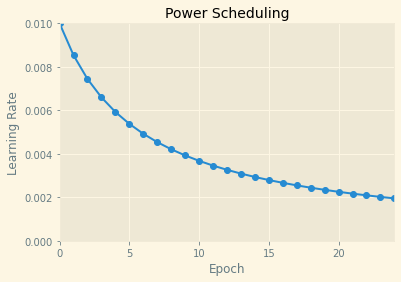

In [12]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)

### Exponential Scheduling

In [15]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [17]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8231 - accuracy: 0.7649 - val_loss: 0.8490 - val_accuracy: 0.7430
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6987 - accuracy: 0.7937 - val_loss: 1.0439 - val_accuracy: 0.7026
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6551 - accuracy: 0.8015 - val_loss: 0.6861 - val_accuracy: 0.8186
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5740 - accuracy: 0.8287 - val_loss: 0.6120 - val_accuracy: 0.8222
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5451 - accuracy: 0.8382 - val_loss: 0.5922 - val_accuracy: 0.8448
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4765 - accuracy: 0.8563 - val_loss: 0.7077 - val_accuracy: 0.8226
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4599 - accuracy: 0.8629 - val_loss: 0.5710 - val_accuracy:

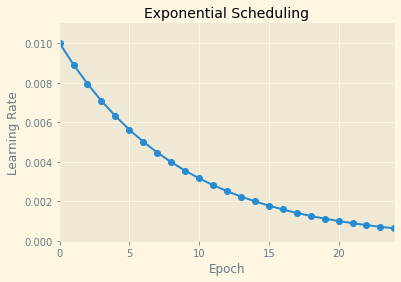

In [18]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)

In [20]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
    
    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs["lr"] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8437 - accuracy: 0.7603 - val_loss: 0.8378 - val_accuracy: 0.7492
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6845 - accuracy: 0.7878 - val_loss: 0.7087 - val_accuracy: 0.7890
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6024 - accuracy: 0.8141 - val_loss: 0.6273 - val_accuracy: 0.8228
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5342 - accuracy: 0.8387 - val_loss: 0.5892 - val_accuracy: 0.8354
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4806 - accuracy: 0.8533 - val_loss: 0.5759 - val_accuracy: 0.8494
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4428 - accuracy: 0.8631 - val_loss: 0.5271 - val_accuracy: 0.8486
Epoch 7/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3966 - accuracy: 0.8740 - val_loss: 0.5047 - val_accuracy:

In [21]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

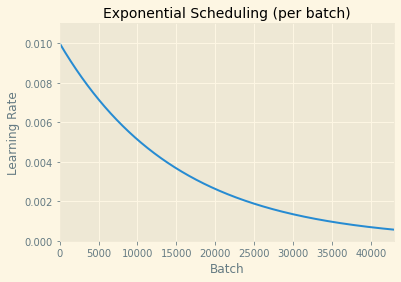

In [22]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)

### Piecewise Constant Scheduling

In [23]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [24]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [27]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8439 - accuracy: 0.7593 - val_loss: 0.6947 - val_accuracy: 0.7824
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9654 - accuracy: 0.6993 - val_loss: 0.9852 - val_accuracy: 0.6314
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 1.1178 - accuracy: 0.6180 - val_loss: 1.1214 - val_accuracy: 0.6012
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0867 - accuracy: 0.6246 - val_loss: 1.0657 - val_accuracy: 0.6322
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0440 - accuracy: 0.6332 - val_loss: 1.0871 - val_accuracy: 0.6278
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8058 - accuracy: 0.6753 - val_loss: 0.8411 - val_accuracy: 0.6612
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7723 - accuracy: 0.6809 - val_loss: 0.8578 - val_accuracy:

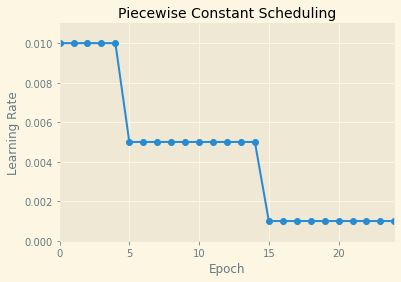

In [28]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)

### Performance Scheduling

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

In [31]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5895 - accuracy: 0.8085 - val_loss: 0.4711 - val_accuracy: 0.8564
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8413 - val_loss: 0.5782 - val_accuracy: 0.8434
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5102 - accuracy: 0.8437 - val_loss: 0.6057 - val_accuracy: 0.8310
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5145 - accuracy: 0.8464 - val_loss: 0.5310 - val_accuracy: 0.8510
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5198 - accuracy: 0.8501 - val_loss: 0.5456 - val_accuracy: 0.8248
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5163 - accuracy: 0.8531 - val_loss: 0.5002 - val_accuracy: 0.8546
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8937 - val_loss: 0.3598 - val_accuracy:

Text(0.5, 1.0, 'Reduce LR on Plateau')

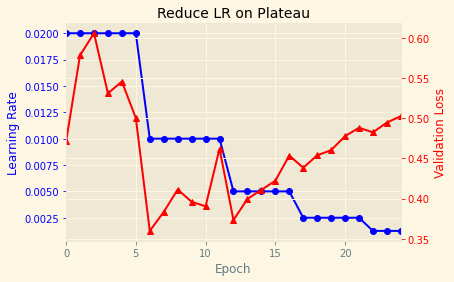

In [32]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color="b")
plt.tick_params("y", colors="b")
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel("Validation Loss", color="r")
ax2.tick_params("y", colors="r")

plt.title("Reduce LR on Plateau", fontsize=14)

### tf.keras schedulers

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train_scaled)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8274 - val_loss: 0.4094 - val_accuracy: 0.8606
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8649 - val_loss: 0.3725 - val_accuracy: 0.8704
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8763 - val_loss: 0.3766 - val_accuracy: 0.8682
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3229 - accuracy: 0.8840 - val_loss: 0.3450 - val_accuracy: 0.8806
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8901 - val_loss: 0.3386 - val_accuracy: 0.8792
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2879 - accuracy: 0.8966 - val_loss: 0.3408 - val_accuracy: 0.8812
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.9004 - val_loss: 0.3357 - val_accuracy:

### 1Cycle scheduling

In [34]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
        
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [35]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [39]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale("log")
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")

In [40]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 4ms/step - loss: 2535943307264000.0000 - accuracy: 0.3855


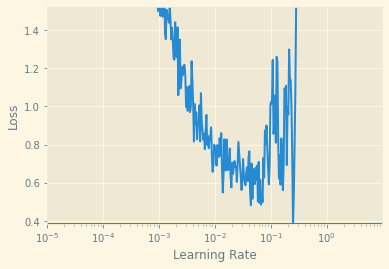

In [41]:
batch_size = 128
rates , losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [45]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
        
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)
        

In [46]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 4ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4581 - accuracy: 0.8395 - val_loss: 0.4275 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8547 - val_loss: 0.4115 - val_accuracy: 0.8582
Epoch 4/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3869 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.3765 - val_accuracy: 0.8680
Epoch 6/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8772 - val_loss: 0.3744 - val_accuracy: 0.8708
Epoch 7/25
430/430 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.8810 - val_loss: 0.3633 - val_accuracy: 0.8714
Epoch 

# Avoiding Overfitting Through Regularization

## $l_1$ and $l_2$ Regularization

In [47]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6223 - accuracy: 0.8109 - val_loss: 0.7201 - val_accuracy: 0.8306
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7204 - accuracy: 0.8269 - val_loss: 0.6843 - val_accuracy: 0.8368


## Dropout

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8652
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4229 - accuracy: 0.8452 - val_loss: 0.3459 - val_accuracy: 0.8702


## MC Dropout

In [49]:
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
y_probas = np.stack([model(X_test_scaled, training=True) for _ in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [51]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.91]],
      dtype=float32)

In [52]:
y_probas.shape

(100, 10000, 10)

In [53]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.18, 0.  , 0.76]],
      dtype=float32)

In [54]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.17, 0.01, 0.21]],
      dtype=float32)

In [55]:
y_pred = np.argmax(y_proba, axis=1)

In [56]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8534